In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [2]:
events_dict = {
    'BLUE: first_blood': 0,
    'BLUE: dragon': 1,
    'BLUE: herald': 2,
    'BLUE: first_tower_top': 3,
    'BLUE: first_tower_mid': 4,
    'BLUE: first_tower_bot': 5,
    'BLUE: second_tower_top': 6,
    'BLUE: second_tower_mid': 7,
    'BLUE: second_tower_bot': 8,
    'BLUE: third_tower_top': 9,
    'BLUE: third_tower_mid': 10,
    'BLUE: third_tower_bot': 11,
    'BLUE: inhibitor_top': 12,
    'BLUE: inhibitor_mid': 13,
    'BLUE: inhibitor_bot': 14,
    'BLUE: baron': 15,
    'BLUE: elder_dragon': 16,
    'BLUE: nexus_tower': 17,
    'BLUE: nexus': 18,
    'RED: first_blood': 19,
    'RED: dragon': 20,
    'RED: herald': 21,
    'RED: first_tower_top': 22,
    'RED: first_tower_mid': 23,
    'RED: first_tower_bot': 24,
    'RED: second_tower_top': 25,
    'RED: second_tower_mid': 26,
    'RED: second_tower_bot': 27,
    'RED: third_tower_top': 28,
    'RED: third_tower_mid': 29,
    'RED: third_tower_bot': 30,
    'RED: inhibitor_top': 31,
    'RED: inhibitor_mid': 32,
    'RED: inhibitor_bot': 33,
    'RED: baron': 34,
    'RED: elder_dragon': 35,
    'RED: nexus_tower': 36,
    'RED: nexus': 37
}

In [3]:
df = pd.read_csv('data/clean-one-line.csv')
df = df.drop('game', axis=1)
data = df.values.tolist()

for game in data:
    for i, s in enumerate(game):
        if s in events_dict:
            game[i] = events_dict.get(s)
        else:
            del game[i]

for game in data:
    game = [item for item in game if not(math.isnan(item)) == True]

data = [[x for x in y if not np.isnan(x)] for y in data]

In [4]:
df = pd.DataFrame()

In [5]:
for game in data:
    firstFiveEvents = game[0:5]
    sixthEvent = game[6]
    gameDict = {
        'event1': firstFiveEvents[0],
        'event2': firstFiveEvents[1],
        'event3': firstFiveEvents[2],
        'event4': firstFiveEvents[3],
        'event5': firstFiveEvents[4],
        'y': sixthEvent
    }
    entry = pd.DataFrame([gameDict])
    df = pd.concat([df, entry], ignore_index=True)

In [6]:
y = df['y'].copy()
X = df.drop(['y'],axis=1)
y.unique()

array([ 5, 24,  3, 23,  1,  2, 20,  8, 22,  4, 21,  6, 27, 25,  7, 26, 15],
      dtype=int64)

In [7]:
def preprocess_input(X,y):
    X = X.copy()
    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)
    scaler = StandardScaler()   
    print(X_train) 
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test = preprocess_input(X,y)

     event1  event2  event3  event4  event5
66       21       0       1       5      22
152       1      21      19       1      22
31       20       0       2      20      22
84        0      20      21       1       5
317      19       2      20      20       5
..      ...     ...     ...     ...     ...
71       19       1      21      22      20
106      20       2      19       5       1
270      19      21      24       1       2
348       1       0       2       1       5
102       0       2      20       5      21

[335 rows x 5 columns]


training model score: 0.17313432835820897
test model score: 0.10714285714285714


c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\linco\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         8
           2       0.15      0.23      0.18        13
           3       0.00      0.00      0.00        11
           4       0.14      0.11      0.12         9
           5       0.00      0.00      0.00         9
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         9
          21       0.00      0.00      0.00         1
          22       0.14      0.43      0.21         7
          23       0.10      0.20      0.13         5
          24       0.20      0.12      0.15         8
          25       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         1

    accuracy                           0.11        84
   macro avg       0.05      0.08      0.06        84
weighted avg       0.07      0.11      0.08        84



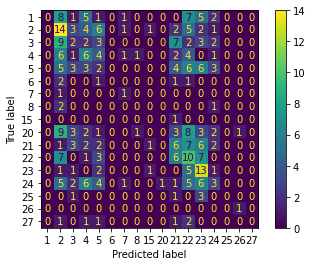

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, classification_report

lrl = LogisticRegression(multi_class='ovr', C=1e12, max_iter=100)

model_ovr = lrl.fit(X_train, y_train)

y_pred = model_ovr.predict(X_test)

print(f'training model score: {model_ovr.score(X_train, y_train)}')
print(f'test model score: {model_ovr.score(X_test, y_test)}')
plot_confusion_matrix(lrl, X_train, y_train)
print(classification_report(y_test, y_pred))